# Hello: Welcome! 
# Problem: Training a model to predict **customer churn** _aka customer attrition_
### student names: 
- Muhammed Hadhoud
- Muhammed Samy
- Muhammed Hosny

1. First we import the libraries that we're going to use.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
from sklearn.metrics import accuracy_score
#import seaborn as sns


2. Read the dataset from a CSV file.

 Here we are also displaying the first 3 rows of the dataset

In [15]:
### Read the dataset from a CSV file
dataset = pd.read_csv("dataset.csv")
### Display the first 3 rows of the dataset
dataset.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


### let's display some dataset information.

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

#### Convert the **`Churn?`** column to binary values (**`1`** for **`True.`** and **`0`** for **`false`**)
#### Convert the **`Int'l Plan`** column to binary values (**`1`** for **`yes`** and **`0`** for **`false`**)
#### Convert the **`VMail Plan`** column to binary values (**`1`** for **`yes`** and **`0`** for **`false`**)

In [17]:
dataset['Churn?'] = np.where(dataset['Churn?'] == 'True.',1, 0)
dataset['Int\'l Plan'] = np.where(dataset['Int\'l Plan'] == 'yes',1, 0)
dataset['VMail Plan'] = np.where(dataset['VMail Plan'] == 'yes',1, 0)


#### Remove columns **`Phone`**, **`State`**,  and **`Area Code`**  from the dataset 
#### as they are not logically correlated with the result. 

In [18]:
dataset= dataset.drop(columns=['Phone','State','Area Code'])

#### Generated a histogram for the **`Churn`** column in the dataset. (notice most of them are **`false`**)

<AxesSubplot:>

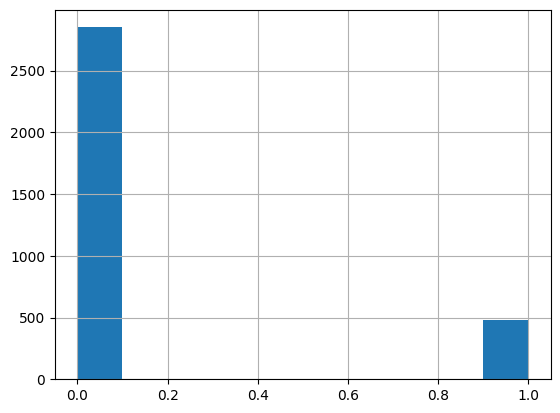

In [19]:
dataset['Churn?'].hist()

#### Created a variable `features` containing all columns except the last one. (excluding `curns` as it's the result)

In [20]:
features = dataset.iloc[:,:-1]
features

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


#### Created a variable `labels` containing the last column(the `churns`).


In [21]:
labels = dataset.iloc[:,-1]
labels

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn?, Length: 3333, dtype: int32

#### Split the data into training and testing sets using a `20%` test size and without shuffling.


In [22]:
features_train, features_test, labels_train, labels_test = skms.train_test_split(features, labels, test_size=0.2, shuffle=False)


#### **`random_state`**: This parameter sets the seed for random number generation. It ensures that the results are reproducible when using random elements in the algorithm.

#### **`learning_rate`**: The learning rate schedule used during training. In this case, it's set to `constant,` meaning the learning rate remains the same throughout training.

#### **`eta0`**: The initial learning rate. It is the starting value for the learning rate and is used because the learning rate is constant.

#### **`max_iter`**: The maximum number of iterations (epochs) for training the model. The model will train up to 5000 iterations before stopping.

In [23]:
LR = sklm.SGDClassifier(random_state=0, shuffle=True, learning_rate="constant", eta0=1, max_iter=100000, fit_intercept=True, penalty='l2', alpha=.000001, loss="hinge")

### This code fits (trains) the Logistic Regression model `LR` using the provided training data, `features_train` and `labels_train`.

In [24]:
LR.fit(features_train, labels_train)

SGDClassifier(alpha=1e-06, eta0=1, learning_rate='constant', max_iter=100000,
              random_state=0)

### generates predictions using the trained Logistic Regression model `LR` on the test features, for evaluating the model's performance.

In [25]:
    prediction = LR.predict(features_test)

### **`Let's see the score`**

In [29]:

accuracy_score(labels_test, prediction)

0.8455772113943029

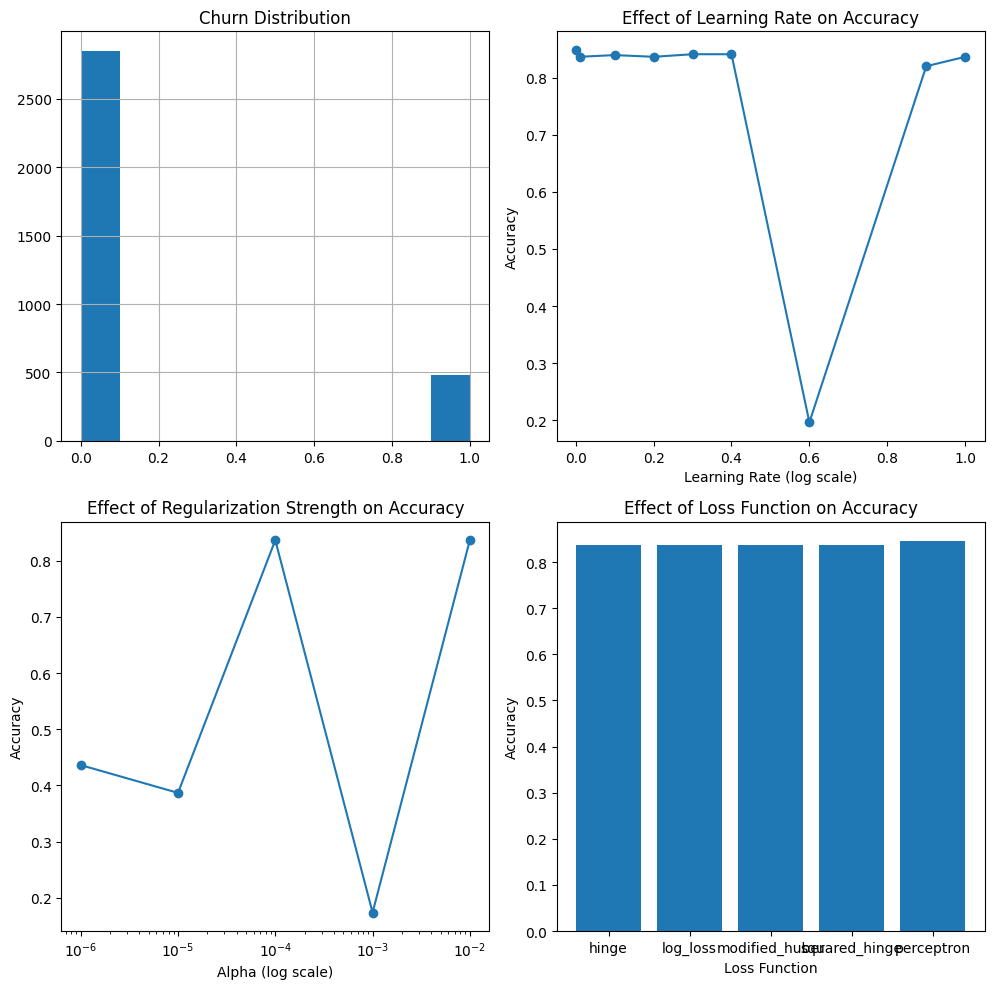

In [27]:


learning_rates=[.001,.01,.1,.2,.3,.4,.6,.9,1]
accuracy_lr=[]

for learning_rate in learning_rates:
    LR = sklm.SGDClassifier(random_state=0, shuffle=True, learning_rate="constant", eta0=learning_rate, max_iter=100000, fit_intercept=True, penalty='l2', alpha=1e-4, loss="log_loss")
    LR.fit(features_train, labels_train)
    prediction = LR.predict(features_test)
    accuracy = accuracy_score(labels_test, prediction)
    accuracy_lr.append(accuracy)

# Vary alpha (regularization strength)
alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
accuracy_alpha = []

for alpha in alphas:
    LR = sklm.SGDClassifier(random_state=0, shuffle=True, learning_rate="constant", eta0=0.01, max_iter=100000, fit_intercept=True, penalty='l2', alpha=alpha, loss="log_loss")
    LR.fit(features_train, labels_train)
    prediction = LR.predict(features_test)
    accuracy = accuracy_score(labels_test, prediction)
    accuracy_alpha.append(accuracy)

# Vary loss function
loss_functions = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
accuracy_loss = []


for loss_function in loss_functions:
    LR = sklm.SGDClassifier(random_state=0, shuffle=True, learning_rate="constant", eta0=0.01, max_iter=100000, fit_intercept=True, penalty='l2', alpha=1e-4, loss=loss_function)
    LR.fit(features_train, labels_train)
    prediction = LR.predict(features_test)
    accuracy = accuracy_score(labels_test, prediction)
    accuracy_loss.append(accuracy)

# Plotting
plt.figure(figsize=(15, 10))

# Original histogram
plt.subplot(2, 3, 1)
dataset['Churn?'].hist()
plt.title('Churn Distribution')

# Learning rate plot
plt.subplot(2, 3, 2)
plt.plot(learning_rates, accuracy_lr, marker='o')
plt.xscale('linear')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Accuracy')

# Alpha plot
plt.subplot(2, 3, 4)
plt.plot(alphas, accuracy_alpha, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Strength on Accuracy')

# Loss function plot
plt.subplot(2, 3, 5)
plt.bar(loss_functions, accuracy_loss)
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.title('Effect of Loss Function on Accuracy')

plt.tight_layout()
plt.show()
